In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [3]:
import glob
import rebound as reb
import seaborn as sns

In [13]:
mearth = 0.000003003  # MSun
days = 1.0/365.25 # Yr

In [14]:
Ps = []
Ms = []
for f in glob.glob('stable/*.bin'):
    sa = reb.SimulationArchive(f)
    Ps.append(sa[0].particles[-1].P)
    Ms.append(sa[0].particles[-1].m)
Ps = array(Ps)/days
Ms = array(Ms)/mearth

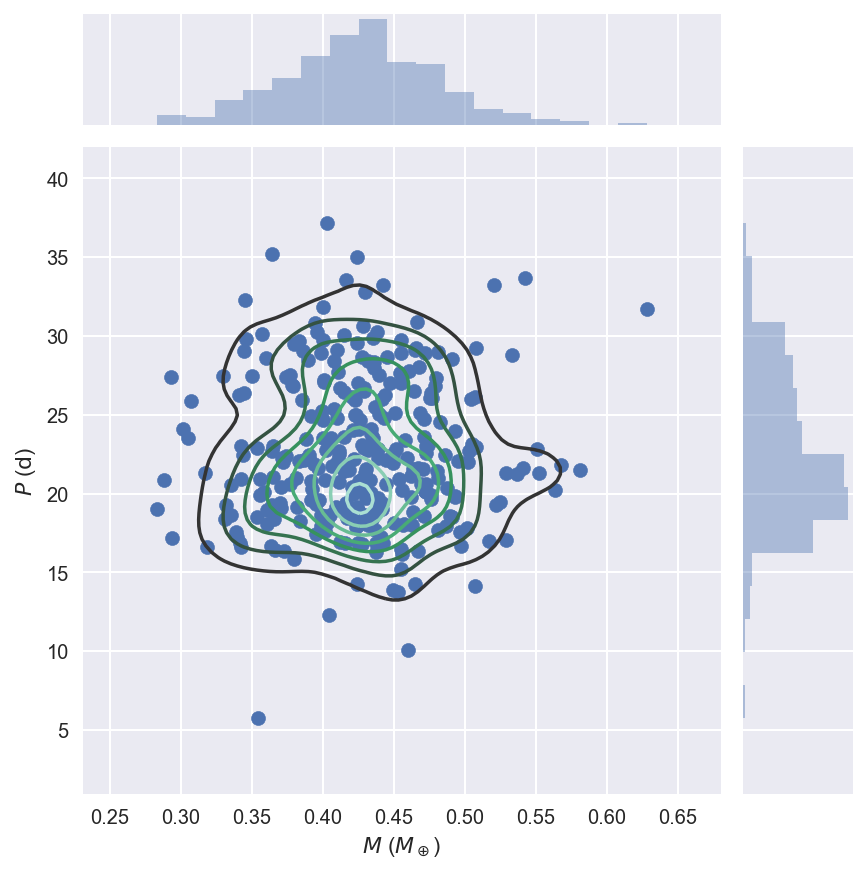

In [16]:
sns.jointplot(Ms, Ps, stat_func=None).plot_joint(sns.kdeplot).set_axis_labels(r'$M$ ($M_\oplus$)', r'$P$ ($\mathrm{d}$)')